<a href="http://www.road2quant.com">
    <img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" target="_blank" align="right" border="0" width="35%" >
</a>

# Intro to Machine Learning Based Strategies

## Importing the required libraries

The libraries that we are going to use are:
- `Yfinance` to download the daily prices from yahoo finance.
- `Numpy` and `Pandas` to manipulate the data.
- `Matplotlib` to create the charts


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

### Graph Formating

In [2]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
symbol = ["AMZN"]
rawdata = yf.download(symbol, start="2010-01-01", end="2019-12-31")
rawdata = pd.DataFrame(rawdata['Close'])
rawdata.columns = ['price']

[*********************100%***********************]  1 of 1 completed


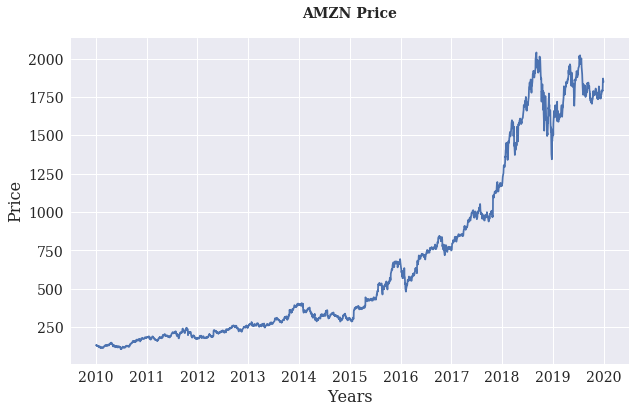

In [4]:
plt.figure(figsize=(10, 6))
plt.title('AMZN Price',fontweight="bold", pad=20)
plt.xlabel('Years')
plt.ylabel('Price')
plt.plot(rawdata);
# plt.savefig('paths.png', facecolor='None')

In [74]:
from sklearn.linear_model import LinearRegression

LM = rawdata.copy()
split = int(len(LM) * 0.6)
LM_train, LM_test = LM[:split], LM[split:]

#  # X_train = LM_train.index.map(dt.datetime.toordinal); X = X.values.reshape(-1, 1)
X_test  = LM_test.index.map(dt.datetime.toordinal).values.reshape(-1, 1)
X_train = LM_train.index.map(dt.datetime.toordinal).values#.reshape(-1, 1)
y_train = LM_train['price'].values#.reshape(-1, 1)

reg = np.polyfit(X_train, y_train, deg=1)

# model = LinearRegression()
# model.fit(X_train,y_train)

In [75]:
# LM['pred'] = model.predict(X_test)

NameError: name 'x' is not defined

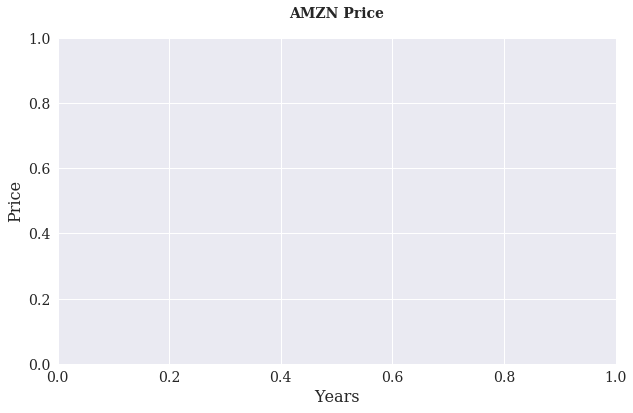

In [76]:
plt.figure(figsize=(10, 6))
plt.title('AMZN Price',fontweight="bold", pad=20)
plt.xlabel('Years')
plt.ylabel('Price')
plt.plot(x, np.polyval(reg, X_train), 'r', lw=2.5,
         label='linear regression')

plt.plot(LM);